In [218]:
%matplotlib inline
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [219]:
print os.listdir(".")

['.DS_Store', '.ipynb_checkpoints', '1246431088.03.jpg', '1246431174.01.jpg', '1246431343.25.jpg', '1246431366.97.jpg', '1246431382.69.jpg', '1246431420.91.jpg', '1246431434.52.jpg', '1246435066.32.jpg', '1246435083.12.jpg', 'Archive.zip', 'Untitled.ipynb', 'vision.ipynb']


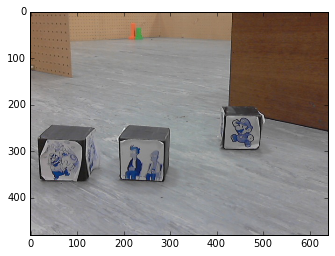

In [220]:
img = cv2.imread('1246431420.91.jpg')
# print img
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

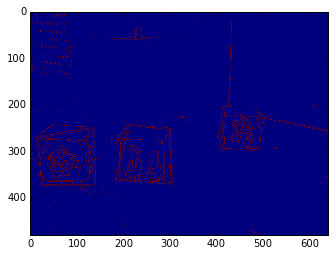

In [222]:
gimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gimg = cv2.GaussianBlur(gimg, (7,7), 5.)
edge = cv2.Canny(img, 130, 150)
plt.imshow(edge)
plt.show()

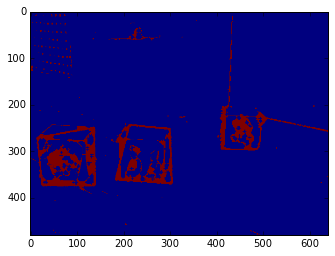

1 (7, 7)


In [223]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
# kernel = np.ones((1,1),np.uint8)
opening = cv2.morphologyEx(edge, cv2.MORPH_CLOSE, kernel)
# dilation = cv2.dilate(edge,kernel,iterations = 1)



# erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(opening)
plt.show()
print cv2.MORPH_CROSS,(7,7)

44


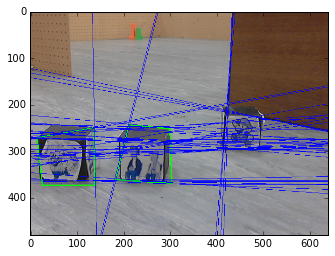

In [224]:
lines = cv2.HoughLines(edge, 1, np.pi/180,80)
print len(lines)
for line in lines:
    rho,theta = (line[0].tolist())
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),1)
plt.imshow(img)
plt.show()